# Projected Gradient Descent

In [1]:
import numpy as np
from numpy import linalg as LA
from sympy import *
import matplotlib.pyplot as plt
import numdifftools as nd
%matplotlib inline

## Part 1

### Consider the following optimization problem
$$f(x) = x^TQx + Bx$$

where

$$Q = \begin{bmatrix}
1 & 1/2 \\ 
1/2 & 2 \\ 
\end{bmatrix} \hspace{25px} B = \begin{bmatrix}
1/2 \\ 
0 \\ 
\end{bmatrix}$$

subject to the following feasible region

$$\frac{3}{2}x+2y \geq 11$$



### Here is the implementation of the projected gradient descent algorithm:

In [2]:
# The following functions are used to perform the projection operation of any point in R2 onto a line
# on which points A and B lie. The 'proy' function is for a two-variable function while the 'proy1D' function
# is for a one-variable function.

def proy(A, B, x):
    return A + ((np.dot((x-A).transpose(), (B-A)))/(np.dot((B-A).transpose(), (B-A))))*(B-A)

def proy1D(A, B, x, f):
    xvec = np.array([[x],[f(x)]])
    return A + ((np.dot((xvec-A).transpose(), (B-A)))/(np.dot((B-A).transpose(), (B-A))))*(B-A)

In [3]:
def gradient_descent_projected(tol, x0, a, f, Nmax):
    # Inputs
    # tol: tolerance of the algorithm, minimum value that should exist between x(k+1) and x(k) to stop iterating.
    # x0: initial condition, necessarily entered as a column vector.
    # a: alpha (size of the steps)
    # f: function to which the algorithm will be applied
    # Nmax: maximum number of iterations

    # k represents the current iteration.
    k = 0

    # dif is a parameter that will represent the distance between x(k+1) and x(k).
    dif = 1

    # A list is created where the current value of the iteration (k) will be stored.
    its = []

    # A list is created where the current value of x(k) will be stored in the case of a function f of one dimension.
    A1dim = []

    # If the function f is 2-dimensional or greater, the following code is applied:
    if isinstance(x0, (list, tuple, np.ndarray)):

        # A matrix is created where the current value of x(k) will be stored. The number of columns of A is the number
        # of variables of the vector x(k).
        A = np.zeros((1, np.shape(x0)[0]))

        # The first row of the matrix corresponds to the initial point.
        A[0, :] = x0.transpose()

        # The algorithm stops when the distance between x(k+1) and x(k) is less than the tolerance value entered by
        # parameter and when the maximum number of iterations has not yet been reached.
        while(k < Nmax and dif > tol):

            # The current value of the iteration is added to the corresponding list.
            its.append(k)

            # The gradient of the function, evaluated at the current iteration, is calculated. The result of this function
            # is a row vector.
            gradient = nd.Gradient(f)(x0)

            # An auxiliary gradient is created but of type column vector, to be able to operate with the initial condition.
            grad = np.zeros((np.size(gradient), 1))

            # The auxiliary gradient vector is filled with the values of the original gradient vector. In this way,
            # the gradient result is already expressed as a column vector, as required to perform operations.
            for i in range(0, np.size(gradient)):
                grad[i] = gradient[i]

            # The gradient descent formula is applied.
            x = x0 - a*grad

            # Points on the line defining the feasible region
            point1 = np.array([[0],[5.5]])
            point2 = np.array([[7.33],[0]])

            # If the new point is inside the feasible region
            if x[1] >= (-3/4)*x[0] + 11/2:
                # The x(k+1) is transposed and then added to matrix A.
                xaux = x.reshape((1, -1))
                A = np.append(A, xaux, axis=0)
            # If the new point is outside the feasible region
            elif x[1] < (-3/4)*x[0] + 11/2:
                # The projection operation is performed to keep it in the feasible region.
                x = proy(point1, point2, x)
                # The x(k+1) is transposed and then added to matrix A.
                xaux = x.reshape((1, -1))
                A = np.append(A, xaux, axis=0)


            # The distance between x(k) and x(k+1) is calculated.
            dif = LA.norm(x-x0)

            # To move on to the next iteration.
            k+=1

            # The recently found value is assigned to the 'old' vector, because this is the one to be used for the next
            # iteration.
            x0 = x

    # If the function f is one-dimensional, the following code is applied:
    elif isinstance(x0, float) or isinstance(x0, int):

        # The algorithm stops when the distance between x(k+1) and x(k) is less than the tolerance value entered by
        # parameter and when the maximum number of iterations has not yet been reached.
        while(k < Nmax and dif > tol):
            A = A1dim

            # The initial condition is added to the list of current values of x(k).
            A1dim.append(x0)

            # The gradient value is found.
            gradient = nd.Gradient(f)(x0)

            # The gradient descent formula is applied and the found value is added to matrix A.
            x = x0 - a*gradient

            # Points on the line defining the feasible region
            point2 = np.array([[0],[5.5]])
            point1 = np.array([[7.33],[0]])

            # If the new point is inside the feasible region
            if f(x) >= (-3/4)*x + 11/2:
                # The new value is added to the list of x(k) values.
                A1dim.append(x)
            # If the new point is outside the feasible region
            elif f(x) < (-3/4)*x + 11/2:
                # The 1D projection is performed to keep it in the feasible region
                x = float(proy1D(point1, point2, x, f)[0])
                # The new value is added to the list of x(k) values.
                A1dim.append(x)

            # The distance between x(k) and x(k+1) is calculated.
            dif = LA.norm(x-x0)

            # To move on to the next iteration.
            k+=1

            # The recently found value is assigned to the 'old' vector, because this is the one to be used for the next
            # iteration.
            x0 = x


    # Outputs:
    # x: final result to which the algorithm converged when the stopping condition was met, i.e., the minimum.
    # A: Matrix where all the x(k) required to reach the minimum x are found.
    # its: Number of iterations it took for the algorithm

    return x, A, its


### The projected gradient descent algorithm is applied to the function with different values of $\alpha$ to find the minimum

In [4]:
# Definition of the function
def f(x):
    Q = np.array([[1,1/2],[1/2,2]])
    B = np.array([[1/2],[0]])
    return (Q[0,0]*x[0]**2 + (Q[0,1]+Q[1,0])*x[0]*x[1] + Q[1,1]*x[1]**2 + B[0]*x[0] + B[1]*x[1])[0]

# Definition of the different parameters needed by the algorithm
alpha = [0.03, 0.1, 0.25, 0.6]
x0 = np.array([[10],[10]])
N = 10000
tol = 10**-6

# List to store the solutions found for each alpha
sols = []

# List to store the matrices found for each alpha
matrices = []

# List to store the number of iterations of the algorithm
iterations = []

# The algorithm is applied iteratively and the solution, the matrix, and the iterations are added to the corresponding list.
for a in alpha:
    x_solution, solutions, ks = gradient_descent_projected(tol, x0, a, f, N)
    sols.append(x_solution)
    matrices.append(solutions)
    iterations.append(ks)


3D plot of the function

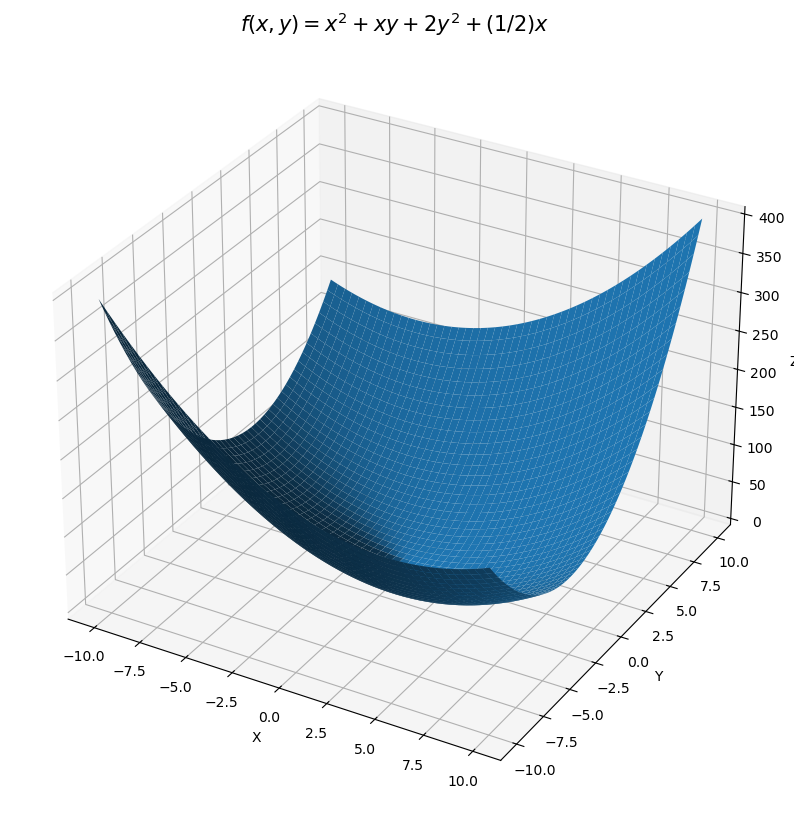

In [5]:
fig = plt.figure(figsize=(12,10))
ax = fig.add_subplot(111, projection='3d')
x = y = np.arange(-10, 10, 0.05)
X, Y = np.meshgrid(x, y)

# Function for plot in R3.
Z = X**2 + X*Y + 2*Y**2 + (1/2)*X

ax.plot_surface(X, Y, Z)

ax.set_title(r"$f(x, y) = x^2 + xy + 2y^2 + (1/2)x$", fontsize="15")
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()

In [6]:
# The algorithm is applied for all values of alpha, to be used when plotting.
x1, sol1, its1 = gradient_descent_projected(tol, x0, alpha[0], f, N)
x2, sol2, its2 = gradient_descent_projected(tol, x0, alpha[1], f, N)
x3, sol3, its3 = gradient_descent_projected(tol, x0, alpha[2], f, N)
x4, sol4, its4 = gradient_descent_projected(tol, x0, alpha[3], f, N)

print(f'Initial point chosen: \n ({float(x0[0])}, {float(x0[1])})')

print(f'\nSolution with a = {alpha[0]}: ' + f'\n x = ({np.round(float(x1[0]), 5)}, {np.round(float(x1[1]), 5)})')
print(f'Number of iterations: {len(its1)}')

print(f'\nSolution with a = {alpha[1]}: ' + f'\n x = ({np.round(float(x2[0]), 5)}, {np.round(float(x2[1]), 5)})')
print(f'Number of iterations: {len(its2)}')

print(f'\nSolution with a = {alpha[2]}: ' + f'\n x = ({np.round(float(x3[0]), 5)}, {np.round(float(x3[1]), 5)})')
print(f'Number of iterations: {len(its3)}')

print(f'\nSolution with a = {alpha[3]}: ' + f'\n x = ({np.round(float(x4[0]), 5)}, {np.round(float(x4[1]), 5)})')
print(f'Number of iterations: {len(its4)}')


Initial point chosen: 
 (10.0, 10.0)

Solution with a = 0.03: 
 x = (3.81903, 2.63443)
Number of iterations: 209

Solution with a = 0.1: 
 x = (3.81902, 2.63443)
Number of iterations: 67

Solution with a = 0.25: 
 x = (3.81902, 2.63444)
Number of iterations: 26

Solution with a = 0.6: 
 x = (3.81902, 2.63444)
Number of iterations: 8


The stopping conditions 

$||x(k+1) - x(k)|| < tol$

$k < N_{max}$

were selected because these conditions guarantee that the difference between the value of $x$ at iteration $k$ and the value of $x$ at iteration $k+1$ is very small. This means that the value $x(k)$ and the value $x(k+1)$ are practically the same. Likewise, the stopping condition $k < N_{max}$ was used to stop the algorithm in extreme cases where the appropriate tolerance has not yet been achieved and there have been many iterations, which can greatly increase the computation time and the computational burden of the program.

## Part 2

### a)
The projected gradient descent algorithm is applied for different values of $\alpha$ and its trajectory is plotted on the contour plots:

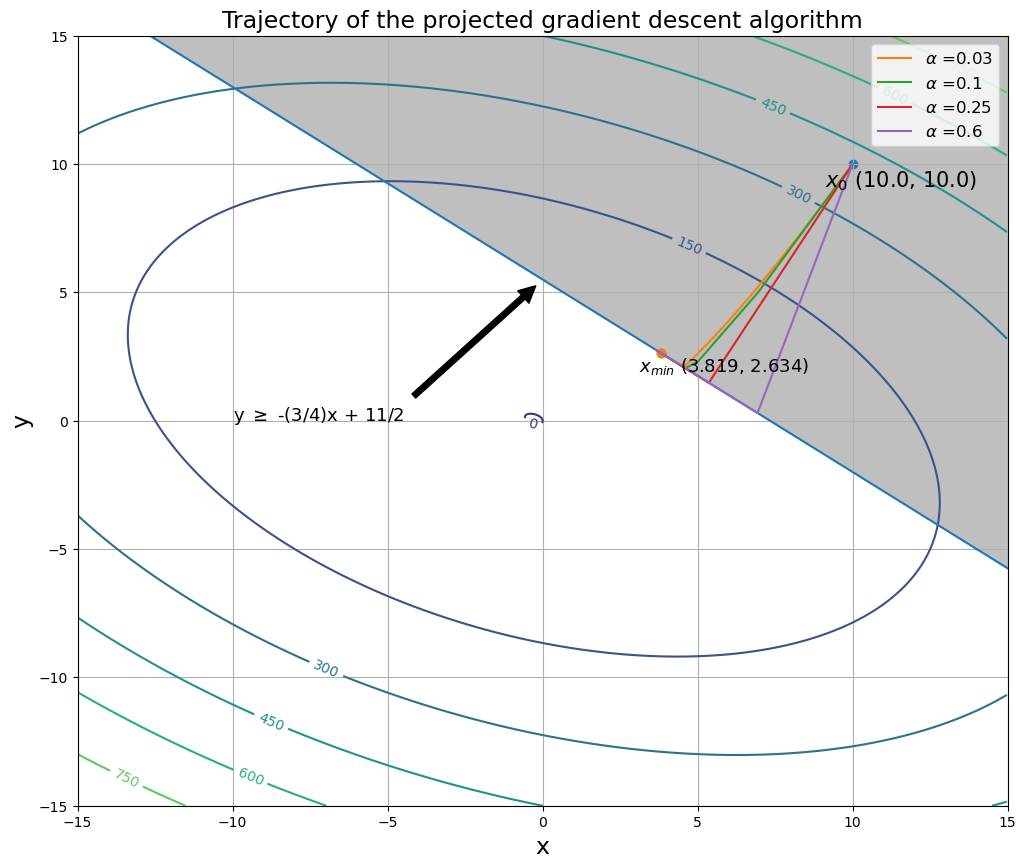

In [7]:
# Contour plot of the function f.
step = 0.025
x = np.arange(-15, 15, step)
y = np.arange(-15, 15, step)
    
X, Y = np.meshgrid(x, y)
Z = X**2 + X*Y + 2*Y**2 + (1/2)*X

fig, ax = plt.subplots(figsize=(12,10))
CS = ax.contour(X, Y, Z)
ax.clabel(CS, inline=True, fontsize=10)

# Construction of the line defining the feasible region
x = np.linspace(-20, 20, 2000)
y1 = (-3/4)*x + 11/2

# Plotting the line
plt.plot(x, y1)
plt.xlim((-15, 15))
plt.ylim((-15, 15))

# Shading the feasible region
plt.fill_between(x, y1, np.max(y1), color='grey', alpha=0.5)

# Plotting the trajectories taken by the algorithm for each corresponding alpha.
plt.plot(sol1[:,0], sol1[:,1], label = r'$\alpha$ =' + f'{alpha[0]}')
plt.plot(sol2[:,0], sol2[:,1], label = r'$\alpha$ =' + f'{alpha[1]}')
plt.plot(sol3[:,0], sol3[:,1], label = r'$\alpha$ =' + f'{alpha[2]}')
plt.plot(sol4[:,0], sol4[:,1], label = r'$\alpha$ =' + f'{alpha[3]}')

plt.annotate("$x_0$ " + f"({float(x0[0])}, {float(x0[1])})", x0-0.9, fontsize="15")
plt.annotate("$x_{min}$" + f' ({np.round(float(x1[0]), 3)}, {np.round(float(x1[1]), 3)})', x1-0.7, fontsize="13")
plt.annotate(r'y $\geq$ -(3/4)x + 11/2', xy=(0, 11/2), xytext=(-10, 0),
            arrowprops=dict(facecolor='black', shrink=0.05), fontsize="13")

plt.scatter([x0[0], x1[0]], [x0[1], x1[1]])
plt.scatter(x2[0], x2[1])
plt.legend(fontsize="12")

ax.set_xlabel('x', fontsize="17")
ax.set_ylabel('y', fontsize="17")
ax.set_title('Trajectory of the projected gradient descent algorithm', fontsize="17")
ax.grid()
plt.show()

Information on how to shade regions in R2 was found [here](https://moonbooks.org/Articles/How-to-fill-an-area-in-matplotlib-/).

Information on how to use the `annotate` function was found [here](https://jakevdp.github.io/PythonDataScienceHandbook/04.09-text-and-annotation.html).

### b) 
Plot of $f(x_k)$ vs. $k$

In [8]:
# Each of these lists will store the value of the function f evaluated at each iteration of the algorithm
valuesf1 = []
valuesf2 = []
valuesf3 = []
valuesf4 = []

# Each list is filled with its corresponding value
for i in range(len(its1)):
    valuesf1.append(float(f(sol1[i])))
    
for i in range(len(its2)):
    valuesf2.append(float(f(sol2[i])))
    
for i in range(len(its3)):
    valuesf3.append(float(f(sol3[i])))

for i in range(len(its4)):
    valuesf4.append(float(f(sol4[i])))

With $\alpha = 0.03$

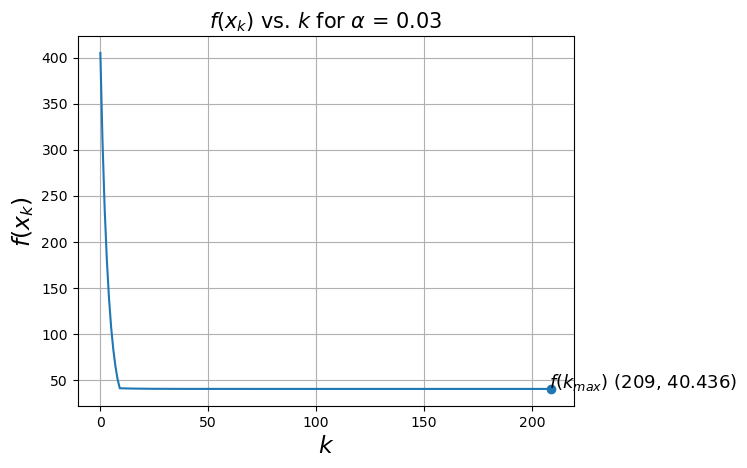

In [9]:
plt.plot(its1, valuesf1)

plt.grid()
plt.title(f'$f(x_k)$ vs. $k$ for ' +  r'$\alpha$ = ' + f'{alpha[0]}',fontsize=15)
plt.scatter(len(its1), float(f(sol1[len(its1)])))
plt.annotate("$f(k_{max})$ " + f"({len(its1)}, {np.round(float(f(sol1[len(its1)])), 3)})", (len(its1)-1, f(sol1[len(its1)])+0.9), fontsize="13")
plt.xlabel('$k$', fontsize="17")
plt.ylabel('$f(x_k)$', fontsize="17")
plt.show()


With $\alpha = 0.1$

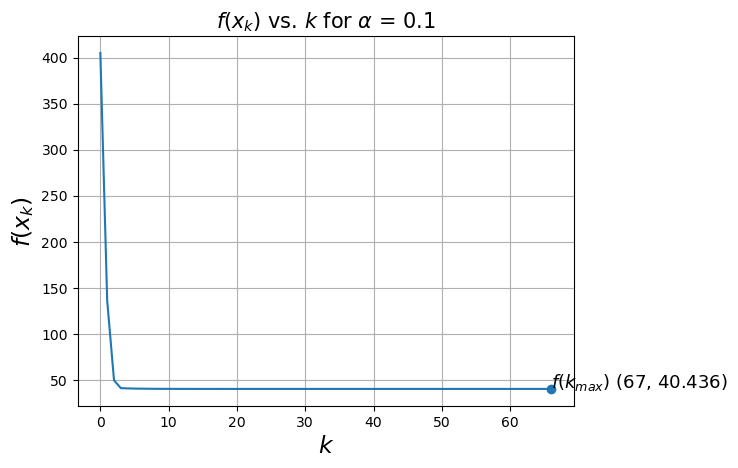

In [10]:
plt.plot(its2, valuesf2)

plt.grid()
plt.title(f'$f(x_k)$ vs. $k$ for ' +  r'$\alpha$ = ' + f'{alpha[1]}',fontsize=15)
plt.scatter(len(its2)-1, float(f(sol2[len(its2)])))
plt.annotate("$f(k_{max})$ " + f"({len(its2)}, {np.round(float(f(sol2[len(its2)])), 3)})", (len(its2)-1, f(sol1[len(its2)])+0.9), fontsize="13")
plt.xlabel('$k$', fontsize="17")
plt.ylabel('$f(x_k)$', fontsize="17")
plt.show()

With $\alpha = 0.25$

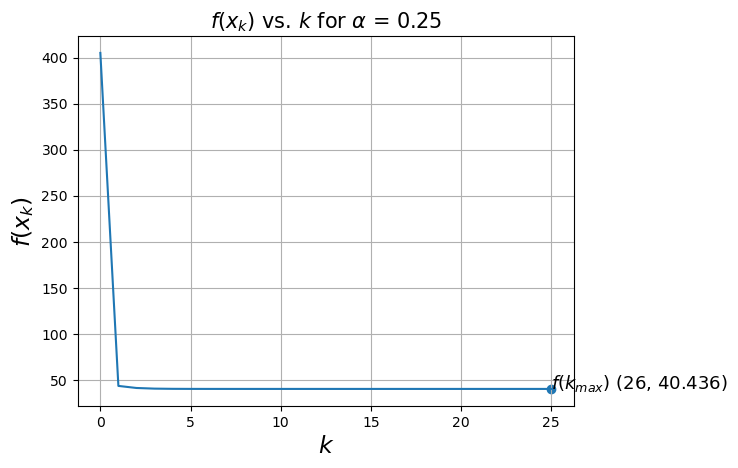

In [11]:
plt.plot(its3, valuesf3)

plt.grid()
plt.title(f'$f(x_k)$ vs. $k$ for ' +  r'$\alpha$ = ' + f'{alpha[2]}',fontsize=15)
plt.scatter(len(its3)-1, float(f(sol3[len(its3)])))
plt.annotate("$f(k_{max})$ " + f"({len(its3)}, {np.round(float(f(sol3[len(its3)])), 3)})", (len(its3)-1, f(sol3[len(its3)])), fontsize="13")
plt.xlabel('$k$', fontsize="17")
plt.ylabel('$f(x_k)$', fontsize="17")
plt.show()


With $\alpha = 0.6$

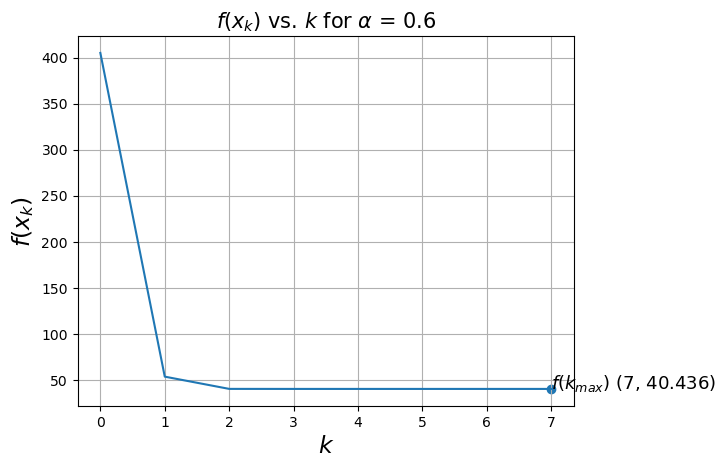

In [12]:
plt.plot(its4, valuesf4)

plt.grid()
plt.title(f'$f(x_k)$ vs. $k$ for ' +  r'$\alpha$ = ' + f'{alpha[3]}',fontsize=15)
plt.scatter(len(its4)-1, float(f(sol4[len(its4)])))
plt.annotate("$f(k_{max})$ " + f"({len(its4)-1}, {np.round(float(f(sol4[len(its4)])), 3)})", (len(its4)-1, f(sol4[len(its4)])), fontsize="13")
plt.xlabel('$k$', fontsize="17")
plt.ylabel('$f(x_k)$', fontsize="17")
plt.show()
